# Mencari Akar Persamaan Non-Linear Satu Variabel

Diberikan suatu fungsi bernilai real dan nonlinear $f(x)$. Cari suatu akar $p$ dari $f(x)$ sedemikian sehingga $f(p)=0$.

__Contoh 1__: Polinomial kuadratik: $f(x)=x^2+5x+6$.
$𝑓(x)=(x+2)(x+3)=0⇒p_1=−2, p_2=−3$.

__Contoh 2__: $f(x)=x^2+4x+10=(x+2)^2+6$.
Tidak ada akar $𝑝$ bernilai real yang memenuhi $f(p)=0$.

__Contoh 3__: $f(x)=x^2+\cos⁡{x}+e^x+\sqrt{x+1}$.
Akar bisa saja sulit untuk ditemukan secara analitik.

__Fokus__: menggunakan metode numerik untuk mengaproksimasi akar.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Metode Bisection

Diberikan $f(x)$ kontinu di interval $[a,b]$ dengan $f(a)$ dan $f(b)$ memiliki tanda yang berlawanan.
Tujuan: Cari $a,b$ sedemikian sehingga $f(a).f(b)<0$. Ini berarti terdapat akar $p∈(a,b)$ sedemikian sehingga $f(r)=0$.

Misalkan $c=(a+b)/2$, titik tengah.
Jika $f(c)=0$, selesai.
Jika tidak, periksa jika $f(c).f(c)<0$ atau $f(c).f(c)<0$.
Pilih interval $[a,c]$ atau $[c,b]$, dan ulangi prosedur ini sampai memenuhi kriteria pemberhentian.

Kriteria Pemberhentian:
* Interval cukup kecil
* $|f(c_n )|$ hampir $0$
* Sudah mencapai iterasi maksimum
* Kombinasi dari yang di atas.

__Contoh 1__:

Diberikan $f(x) = x^3 + 4x^2 - 10$. Cari akar dari $f(x)$ di interval $[1,2]$ menggunakan metode Bisection dengan $\varepsilon = 10^{-4}$

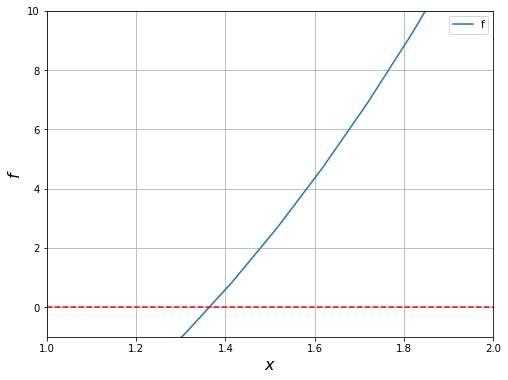

In [2]:
x = np.linspace(0, 10, 100)
fungsi = x**3 + 4*x**2 - 10.
g = np.zeros(x.size)

plt.figure(figsize=(8,6))
plt.plot(x, fungsi, x, g, 'r--')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$f$", fontsize=16)
plt.ylim([-1., 10])
plt.xlim([1., 2.])
plt.grid()
plt.legend("f", loc='best');

In [11]:
def bisection(func, a, b, epsilon=1e-4, N=1000):
    f = func
    FA = f(a)
    for i in range(N):
        p = a + (b-a)/2
        FP = f(p)
        print("iterasi {:2d}\t p = {:2.4f}\t f(p) = {:2.4f}\t a = {:2.4f}\t b = {:2.4f}".format(i, p, FP, a, b))
        if np.abs(FP) <= epsilon or (b-a)/2 <= epsilon:
            break
        else:
            if FA*FP > epsilon:
                a = p
                FA = FP
            else:
                b = p
    return p,FP,a,b,i

In [12]:
f = lambda x: x**3 + 4*x**2 - 10
hasil = bisection(f, a=1, b=2, epsilon=1e-4, N=100)
print("p = {}, f(p) = {}, a = {}, b = {}, Total iterasi = {}".format(hasil[0], hasil[1], hasil[2], hasil[3], hasil[4]+1))

iterasi =  0	 p = 1.5000	 f(p) = 2.3750	 a = 1.0000	 b = 2.0000
iterasi =  1	 p = 1.2500	 f(p) = -1.7969	 a = 1.0000	 b = 1.5000
iterasi =  2	 p = 1.3750	 f(p) = 0.1621	 a = 1.2500	 b = 1.5000
iterasi =  3	 p = 1.3125	 f(p) = -0.8484	 a = 1.2500	 b = 1.3750
iterasi =  4	 p = 1.3438	 f(p) = -0.3510	 a = 1.3125	 b = 1.3750
iterasi =  5	 p = 1.3594	 f(p) = -0.0964	 a = 1.3438	 b = 1.3750
iterasi =  6	 p = 1.3672	 f(p) = 0.0324	 a = 1.3594	 b = 1.3750
iterasi =  7	 p = 1.3633	 f(p) = -0.0321	 a = 1.3594	 b = 1.3672
iterasi =  8	 p = 1.3652	 f(p) = 0.0001	 a = 1.3633	 b = 1.3672
p = 1.365234375, f(p) = 7.202476263046265e-05, a = 1.36328125, b = 1.3671875, Total iterasi = 9


## Iterasi Fixed Point

### Contoh 1
Carilah akar dari $f(x)=x−\cos{⁡(x)}$ dengan akurasi 4-digit

In [ ]:
x = np.linspace(0, 1.2, 100)
g = np.cos(x)

plt.figure(figsize=(8,6))
plt.plot(x, g, x, x, 'r--')
plt.xlabel('x', fontsize=16)
plt.ylabel("$f$, $g$", fontsize=16)
# plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.ylim([0.1, 1.1])
plt.xlim([0.1, 1.2])
plt.grid()
plt.legend(["$f$", "$g$"], loc='best');

### Contoh 

Selesaikan $f(x)=e^{-2x}\cdot (x-1)$

In [ ]:
x = np.linspace(0.1, 1., 100)
f = np.exp(-2*x) * (x-1)
g = -np.exp(-2*x) * (x-1) - x

plt.figure(figsize=(8, 6))
plt.plot(x, g, 'b', x, x, 'g--')
plt.xlabel('x', fontsize=16)
plt.ylabel("$f$, $g$", fontsize=16)
plt.grid()
plt.legend(["$f$", "$g$"], loc='best');

In [ ]:
import sympy
sympy.init_printing(pretty_print=True)

In [ ]:
x = sympy.symbols('x')
g_simbol = -1*sympy.exp(-2*x) * (x-1) + x
g_aksen = sympy.diff(g_simbol, x)
print(g_aksen)

In [ ]:
ksi = 1
g_aksen_eval = sympy.lambdify(x, g_aksen, "numpy")
print(np.abs(g_aksen_eval(ksi)))

In [ ]:
def g(x):
    return -1*np.exp(-2*x) * (x-1) + x

def iterasi_fixed_point(N, epsilon, p0):
    print('     p\t\t     g(p)      \tresidual')
    print('------------------------------------------------')
    for i in range(N):
        p = g(p0)
        if (np.abs(p-p0) < epsilon):
            break    
        print('{:8.4f}\t{:10.4f}\t{:10.4f}\t'.format(p, g(p), np.abs(p-p0)))
        p0 = p
        if (i>=N):
            break
    return 0

In [ ]:
iterasi_fixed_point(100, 1e-4, 0.9)